In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('rc.integrated.scale.data.h5ad')
adata = sc.AnnData(X=adata.X.T)

In [3]:
pca = sc.read_h5ad('rc.integrated.pca.data.h5ad')
pca.X.shape

(110427, 50)

In [4]:
umap = sc.read_h5ad('rc.integrated.umap.data.h5ad')
umap.X.shape

(110427, 2)

In [5]:
features = pd.read_csv("features.csv", sep=",",index_col=0)
cell_names = pd.read_csv("cell_names.csv",index_col=0)

adata.var_names = features.values.reshape(-1)
adata.obs_names = cell_names.values.reshape(-1)

In [6]:
consensus_time = pd.read_csv("rc.integrated.consensus.time.csv",index_col=0)
adata.uns["consensus_time"] = consensus_time.values.reshape(-1)

In [7]:
cell_type = pd.read_csv("cell_type.csv",index_col=0)
sample_labels = cell_type.values.reshape(-1)
data_clusters_set = set(sample_labels)
zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
dict_types = dict(zip_types)
cell_clusters  =  [dict_types[i] for i in sample_labels]

In [8]:
adata.obsm["X_pca"] = pca.X
adata.obsm["umap"] = umap.X
adata.obs["cell_type"] = cell_type.values.reshape(-1)
adata.obs["cell_type2"] = np.array(cell_clusters)

In [9]:
adata.uns["iroot"] = 3631 # 59365,82261,106047

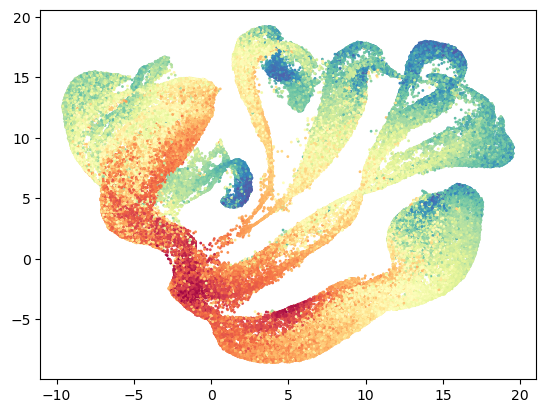

In [10]:
umap = adata.obsm['umap']
consensus_time = adata.uns['consensus_time']
plt.scatter(umap[:,0],umap[:,1], c=consensus_time,s =1,cmap="Spectral")

In [11]:
adata.write('rc.integrated.data.h5ad', compression="gzip")

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn import manifold,datasets,decomposition,cluster
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('rc.integrated.data.h5ad')
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [3]:
from dtne import *
import time

In [4]:
X_pca = adata.obsm["X_pca"] 

The code runs 529s.


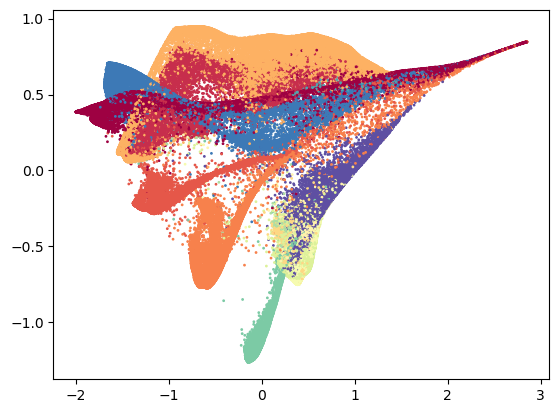

In [5]:
start_time = time.time()
embedding = DTNE(k_neighbors =300, l1 = 20) # l1 = 10,
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

The code runs 532s.


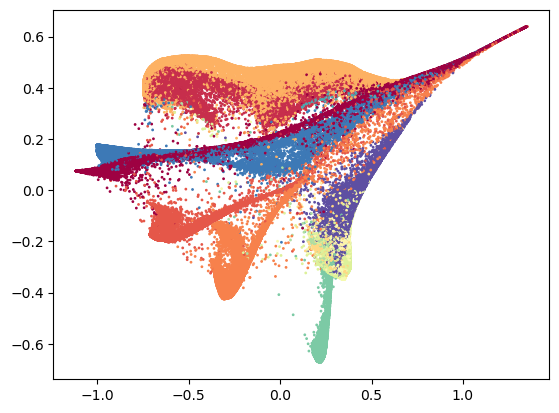

In [5]:
start_time = time.time()
embedding = DTNE(k_neighbors =300, l1 = 40) # l1 = 10,
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

The code runs 1337s.


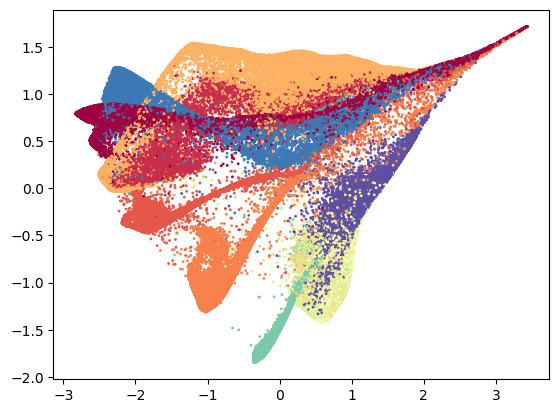

In [6]:
start_time = time.time()
embedding = DTNE(k_neighbors =800, l1 = 5) # l1 = 10,
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

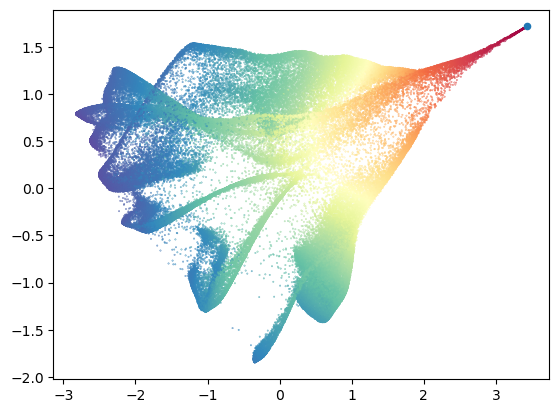

In [7]:
diff_time = embedding.order_cells(root_cells=[3631])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=0.1,cmap='Spectral')
plt.scatter(Y[3631,0], Y[3631,1],s=20)

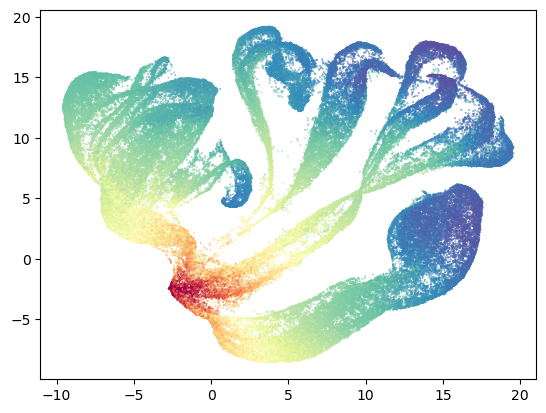

In [8]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0],umap[:,1], c=diff_time,s =0.1,cmap="Spectral")

In [9]:
# start_time = time.time()
# embedding = DTNE(k_neighbors =800, l1 = 20) # l1 = 10,
# Y = embedding.fit_transform(X_pca)
# end_time = time.time()
# print('The code runs {:.0f}s.'.format(end_time - start_time))
# diff_time = embedding.order_cells(root_cells=[3631])
# plt.scatter(umap[:,0],umap[:,1], c=diff_time,s =0.1,cmap="Spectral")

In [22]:
pd.DataFrame(Y).to_csv('rc.integrated.dtne_y.csv')

In [18]:
pd.DataFrame(diff_time).to_csv('rc.integrated.dtne_pseudotime.csv')

hello 10 11
The code runs 197s.


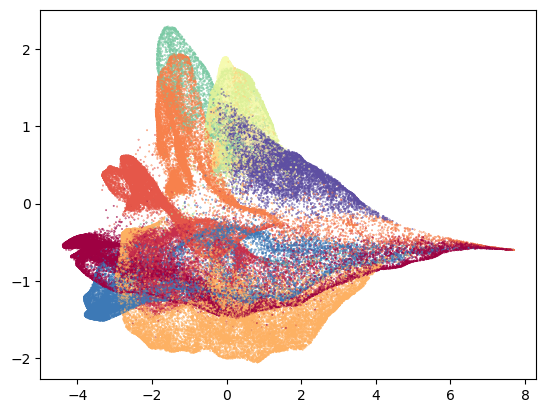

In [13]:
start_time = time.time()
embedding = DTNE(k_neighbors =100, l1 = 10)
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
# plt.scatter(Y[:,0], Y[:,1],c=adata.obs["cell_type2"],s=0.1,cmap='Spectral')

diff_time = embedding.order_cells(root_cells=[3631])
plt.scatter(umap[:,0],umap[:,1], c=diff_time,s =0.1,cmap="Spectral")

Calculating PHATE...
  Running PHATE on 110427 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 294.18 seconds.
    Calculating affinities...
    Calculated affinities in 6.41 seconds.
  Calculated graph and diffusion operator in 302.02 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 58.08 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.15 seconds.
  Calculated landmark operator in 69.09 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.11 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.65 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.47 seconds.
Calculated PHATE in 379.35 seconds.


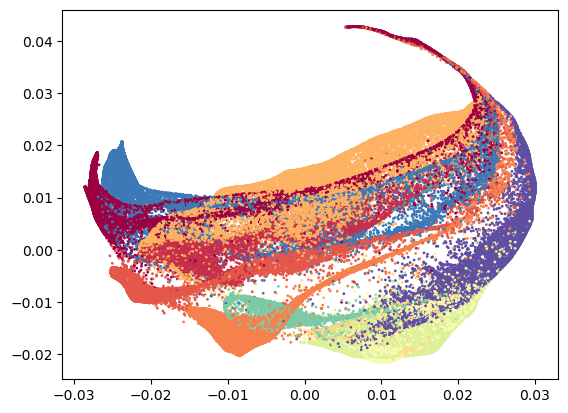

In [8]:
import phate
phate_operator = phate.PHATE(knn=100)
Y_phate = phate_operator.fit_transform(X_pca)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=adata.obs["cell_type2"],s=1,cmap='Spectral')

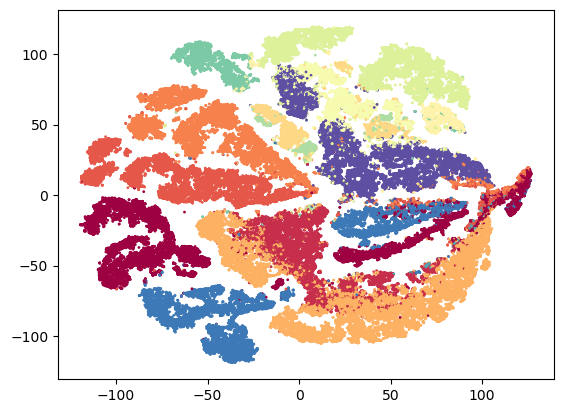

In [5]:
from sklearn import neighbors, decomposition, manifold
tsne_operator = manifold.TSNE(perplexity=50)
Y_tsne = tsne_operator.fit_transform(X_pca)
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=adata.obs["cell_type2"],s =1,cmap="Spectral")

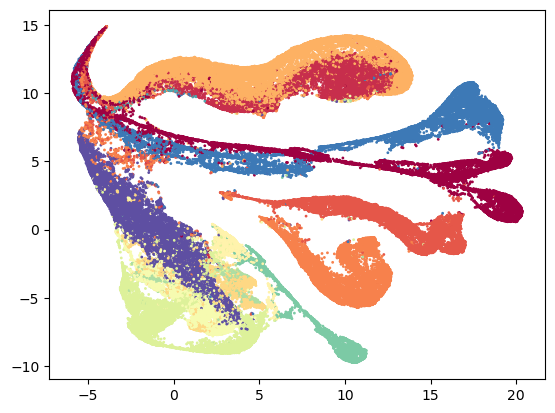

In [6]:
from umap import UMAP
reducer = UMAP() #   n_neighbors=15,min_dist=0.6,
Y_umap = reducer.fit_transform(X_pca)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=adata.obs["cell_type2"],s =1,cmap="Spectral")

In [7]:
pd.DataFrame(Y_tsne).to_csv('rc.integrated.tsne_y.csv')
pd.DataFrame(Y_umap).to_csv('rc.integrated.umap_y.csv')

In [9]:
pd.DataFrame(Y_phate).to_csv('rc.integrated.phate_y.csv')